# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [16]:
#Importing necessary libraries and the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

# 1. Is the distribution of body temperatures normal?

According to the description of the dataset, the data were sampled randomly. Hence, the distribution of the data can be generalized to the overall population (?? what about dependency?). Let's examine the dataset:

In [2]:
#First 10 records
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
#Summary statistic
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

The mean and the median are almost equal, hence there's very little skew in the distribution. Let's look at the histogram:

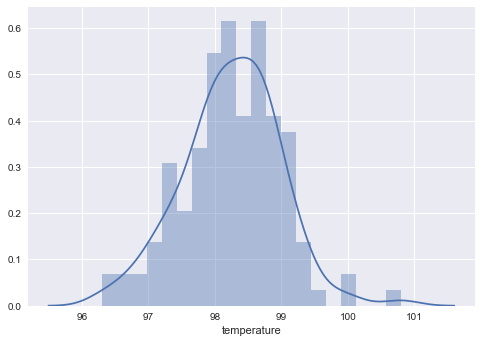

In [33]:
#Plotting the histogram
sns.distplot(df.temperature, bins = 20)
plt.show()

The overall shape of the distribution resembles normal, but there are some peaks. Let's look at the empirical cumulative distribution for comparison. 

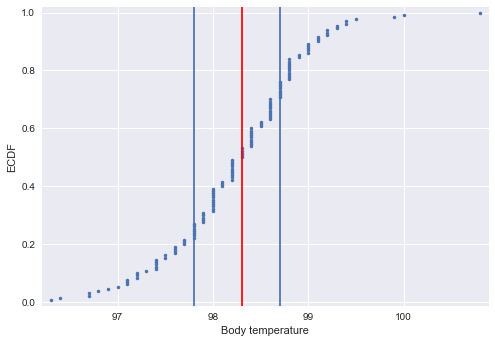

In [5]:
#Sorting the values and creating the x and y axes

#Sorted x axis
x = np.sort(df['temperature'])

#Y axis - evenly spaced datapoints with a maximum of 1
y = np.arange(1, len(x)+1) / len(x)

#Plotting the ECDF with the 25-50-75 percentile marks
_ = plt.plot(x, y, marker='.', linestyle= 'none')
_ = plt.xlabel('Body temperature')
_ = plt.ylabel('ECDF')
#Percentiles (from the summary above)
_ = plt.axvline(x=98.3, color ='red')
_ = plt.axvline(x=97.8)
_ = plt.axvline(x=98.7)
plt.margins(0.02)
plt.show()

There's a slight skew to the right, but, with enough sample sizes, the distribution can be treated as normal. Let's also compare the distribution to the theoretical ECDF with the same mean and standard deviation:

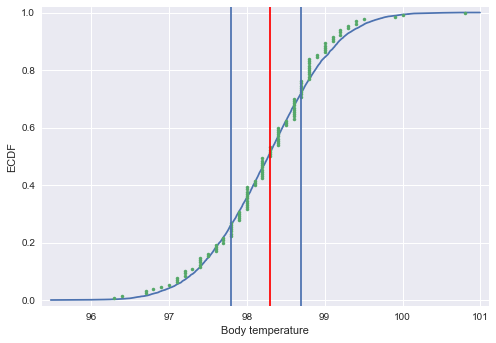

In [6]:
#Calculating mean and standard deviation: mu, sigma
mu = np.mean(x)
sigma = np.std(x)

#Generating random normal distribution
samples = np.random.normal(mu, sigma, 10000)

#Generating theoretical x and y
x_theor = np.sort(samples)
y_theor = np.arange(1, len(x_theor)+1) / len(x_theor)

#Plotting the ECDFs with the 25-50-75 percentile marks
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle= 'none')
_ = plt.xlabel('Body temperature')
_ = plt.ylabel('ECDF')
#Percentiles (from the summary above)
_ = plt.axvline(x=98.3, color ='red')
_ = plt.axvline(x=97.8)
_ = plt.axvline(x=98.7)
plt.margins(0.02)
plt.show()

As can be seen on the plot, the data fit theoretical normal distribution very well. Let's also do the "back of the envelope" analysis of normality by calculating how far the minimum and maximum observations are from the mean.

In [7]:
#Min value - distance from the mean in standard deviations
(min(df.temperature) - np.mean(df.temperature)) / np.std(df.temperature)

-2.6688711006174173

In [8]:
#Max value - distance from the mean in standard deviations
(max(df.temperature) - np.mean(df.temperature)) / np.std(df.temperature)

3.4924927267747696

The minimum value is within 3 standard deviations from the mean, and the maximum value is 3.5 standard deviations from the mean. Let's see how many values exactly are above 3 standard deviations from the mean:

In [9]:
#Calculating the distance from the mean for the last 5 observations sorted in ascending order
(pd.DataFrame(x).tail() - np.mean(df.temperature)) / np.std(df.temperature)

,0
125,1.575624
126,1.712543
127,2.260220
128,2.397139
129,3.492493


Only 1 out of 130 observations is beyond 3 standard deviations from the mean, so we can consider the distribution to be be well-described by the normal model.

# 2. Is the sample size large? Are the observations independent?

As a rule of thumb, the distribution should have at least 30 observations in order for the normal distribution to be a valid model. Since we have 130 observations, this condition is met. The description for the data states that the data were collected through random sampling, but there's no information on whether the sampled data are independent. Since other conditions of "normality" are met and since we have no information on independency, we will consider the samples to be independent.

# 3. Is the true population mean really 98.6 degrees F?

Let's start with a a bootstrap hypothesis test. Our null hypothesis is that the true population mean for our sample is really 98.6 F. That is, we will check if it is possible to obtain the distribution of the values in the sample that we observed above if the true population mean is 98.6 F. Another way to state the hypothesis is to say that the difference between the true population mean of our sample and Wunderlich's value is zero.

First, we'll need to shift our sample, so that the mean of our sample matches the Wunderlich's value:

- define test statistic

- generate many sets of simulated data, assuming that the null hypothesis is true

- compute test statistic for each simulated data set

- p-value - fraction of the simulated data sets for which the test statistic is at least as extreme as for the real data

In [10]:
#Wunderlich's value
wun_mean = 98.6

sample_shifted = df.temperature - np.mean(df.temperature) + wun_mean

#Checking if the mean shifted correctly
sample_shifted.describe()

count    130.000000
mean      98.600000
std        0.733183
min       96.650769
25%       98.150769
50%       98.650769
75%       99.050769
max      101.150769
Name: temperature, dtype: float64

The test statistic is the mean of the bootstrapped sample minus the Wunderlich's value. Let's write a function to compute it:

In [11]:
#Function to compute difference of means
def diff_from_wun(data, wun_value = 98.6):
    return np.mean(data) - wun_value

#Computing the observed test statistic
diff_obs = diff_from_wun(df.temperature)
diff_obs

-0.35076923076921673

We need to identify if this difference is statistically significant. For that, let's define the bootstrap function and generate bootstrap replicates:

In [12]:
#Defining function to draw bootstrap replicates
def draw_bs_reps(data, func, size=1):
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

#Generating 10000 bootstrap replicates with the shifted data
bs_replicates = draw_bs_reps(sample_shifted, diff_from_wun, size=10000)

To calculate the p-value for our sample's mean, we'll use the following formula. We'll use "less than or equal" because the observed sample mean was less than Wunderlich's value.

In [13]:
#Getting the bootstrap p value
p_value = np.sum(bs_replicates <= diff_obs)/10000
p_value

0.0

P-value is very small, so we reject the null hypothesis, according to which the true population mean for our sample is 98.6 F. The p-value is so small, actually, that our observed difference doesn't even appear in the bootstrapped dataset. Here's the minimum value in the dataset:

In [14]:
min(bs_replicates)

-0.24692307692308191

Now, let's try the frequentist's approach. We will use the one-sample approach (same as in the bootstrapped example above), since we're comparing our sample to a single value. For our case, we will use the t-statistic, since the population standard deviation is unknown. A standard case for t-statistic is a small sample, and, since our sample size is not small, the results of using t-statistic and z-statistic should be close.

Our null-hypothesis is the same: our true population mean is equal to Wunderlich's value. To do a t-test, we'll use the ttest_1samp function from the scipy.stats package. The function returns the t-score and the two-sided value as array.

In [17]:
#Getting t and p
t, p = stats.ttest_1samp(df.temperature, wun_mean)

print('t:', t)
print('p:', p)

t: -5.45482329236
p: 2.41063204156e-07


As we can see, the t-statistic is large (in absolute terms) and the p-value is very small, so we again reject the null-hypothesis. Let's compare it to the z-statistic approach:

In [18]:
#Calculating the standard error of the mean
mse = np.std(df.temperature)/np.sqrt(len(df.temperature))

#Calculating the z-score
z = (np.mean(df.temperature) - wun_mean) / mse

#Calculating two-sided p-value
p_norm = stats.norm.cdf(z) * 2

print('z:', z)
print('p norm:', p)

z: -5.47592520208
p norm: 2.41063204156e-07


As we can see, the values are almost identical to the values generated by the t-test, so we reject the null-hypothesis once again.

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests

Let's draw the sample and calculate both test statistics. Since we have only 10 samples and the standard deviation of the population is not known, we should use t-statistic.

In [19]:
#Setting the seed
np.random.seed(42)

#Drawing the sample
sample = np.random.choice(df.temperature, size=10)

#Calculating the t-statistic
t_10, p_10 = stats.ttest_1samp(sample, wun_mean)

print('t_10:', t_10)
print('p_10:', p_10)

#Calculating the z-statistic
#mse = stats.sem(sample)
mse_10 = np.std(sample)/np.sqrt(len(sample))
z_10 = (np.mean(sample) - wun_mean) / mse_10

#Calculating two-sided p-value
p_norm_10 = stats.norm.cdf(z) * 2

print('z_10:', z_10)
print('p_norm_10:', p_norm_10)

t_10: -3.09344792023
p_10: 0.0128577046048
z_10: -3.26078041701
p_norm_10: 4.35231516588e-08


Z-statistic gives a smaller p-value, but, since the sample is small and the standard deviation of the population not known (we use the standard deviation of the sample as approximation), it is more appropriate to use t-statistic. In general, t-distribution has thicker "tails" compared to the normal distribution, which requires larger t-statistic values in order to reach statistical significance.

Since our sample mean is less than Wunderlich's value, we're only interested in one-sided significance test, which will give us a significance level of 99.4%: 

In [20]:
#Calculating the significance level for one-sided hypothesis test
1 - stats.t.cdf(t_10, (10-1))

0.99357114769759536

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

As a rule of thumb, an abnormal temperature would be the one that is more than 2 standard deviations higher or lower than the population mean (95% confidence interval). Since we only have a sample and don't know neither the true population mean, nor the population standard deviation, we will need to estimate both from our sample. The population standard deviation is estimated by the sample standard deviation and the population mean is estimated by the sample mean (also called mean or arithmetic mean). To account for these estimations, the 95% prediction interval (95% PI) is calculated as:

Prediction Interval = sample_mean +/- t(97.5%) * sample_standard_deviation * sqrt((n + 1)/n),

where t(97.5%) is the t-statistic for 97.5th percentile (the absolute value of which is identical to t-statistic for 2.5th percentile) and n is the number of samples.

The second part of the formula multiplies the sample standard deviation by sqrt((n + 1)/n) instead of sqrt(n), since the latter would only give the confidence interval for predicting the population mean from the sample mean and not the prediction interval. Using sqrt(n) in our case would make almost all values "abnormal" with the increase of n, as the increasing sample size decreases the uncertainty around the predicted population mean. Hence, the confidence interval around predicted mean would be very narrow.

More on the methodolody can be found [here](https://en.wikipedia.org/wiki/Reference_range).

In [28]:
#Calculating the t-statistic for 97.5th percentile and n-1 degrees of freedom using stats package
t = stats.t.ppf(0.975, len(df.temperature) - 1)

#Calculating the prediction interval
pred_int_upper = df.temperature.mean() + t * df.temperature.std() * np.sqrt((1 + 1/(len(df.temperature))))
pred_int_lower = df.temperature.mean() - t * df.temperature.std() * np.sqrt((1 + 1/(len(df.temperature))))

print('Prediction interval - lower boundary:', pred_int_lower)
print('Prediction interval - upper boundary:', pred_int_upper)

Prediction interval - lower boundary: 96.7930413118
Prediction interval - upper boundary: 99.7054202267


Let's also display this graphically:

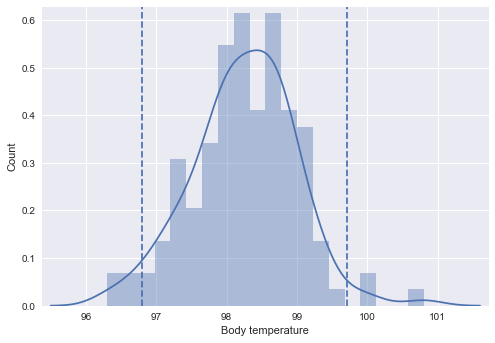

In [68]:
#Plotting the distribution
sns.distplot(df.temperature, bins = 20)
#Prediction interval boundaries
_ = plt.axvline(x=pred_int_lower, linestyle = 'dashed')
_ = plt.axvline(x=pred_int_upper, linestyle = 'dashed')
_ = plt.xlabel('Body temperature')
_ = plt.ylabel('Count')
plt.margins(0.02)
plt.show()

Consequentially, the "abnormal" body temperature would be the temperature below 96.8 F or above 99.7F. Let's now calculate the 2.5th and 97.5th percentiles for the bootstrapped sample and see if they match our frequentist approach above.

In [70]:
#Setting a random seed
np.random.seed(42)

#Drawing 1,000,000 samples with replacement
temp_bootstrapped = np.random.choice(df.temperature, size=1000000, replace=True)
pd.DataFrame(temp_bootstrapped).describe()

#Calculating bootstrapped temperature boundaries
bootstrapped_percentiles = np.percentile(temp_bootstrapped, [2.5, 97.5])
print(bootstrapped_percentiles)

[ 96.7  99.5]


As we can see, the bootstrapped temperature boundaries are very close to the ones calculated with the frequentist approach.

# Is there a significant difference between males and females in normal temperature?

First of all, let's find out if the temperature differs by sex:

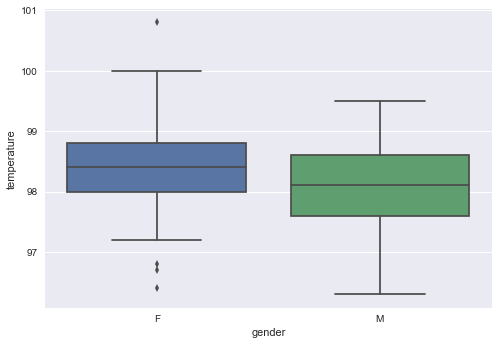

In [73]:
#Plotting a boxplot of temperatures for different sexes
sns.boxplot(x='gender', y='temperature', data=df)
plt.show()

The median is visibly different. Let's check the mean, which we'll consider to be the normal temperature:

In [85]:
#Splitting the dataset by gender
female_t = df.temperature[df.gender == 'F']
male_t = df.temperature[df.gender == 'M']

#Calculating the means
mean_f = female_t.mean()
mean_m = male_t.mean()

#Showing the means and the lenghts of each data subset
[mean_f, mean_m, len(female_t), len(male_t)]

[98.39384615384613, 98.1046153846154, 65, 65]

The means differ, so we'll need to do a hypothesis test to define if this difference is statistically significant.

The null-hypothesis for this question will be that males and females have the same normal temperature - that is, that the difference in normal temperature between the sexes is zero. For this case, it's appropriate to use a permutation test, which simulates the null-hypothesis and shows if only the random sampling/randomization explains the difference seen, or a two-sample t-test, which assumes that the distribution of the temperatures is approximately normal. Since the distribution of the temperatures may not be exactly normal and since our sample size is not too big, we can use a permutation test.

Let's perform the permutation test, starting with defining the functions required for permutation:

In [90]:
#Defining a function to produce a permutation sample
def perm_sample(data1, data2):

    #Concatenating the data sets
    data = np.concatenate((data1, data2))

    #Doing the permutation
    perm_data = np.random.permutation(data)

    # Split the permuted array into two samples:
    perm_sample_1 = perm_data[:len(data1)]
    perm_sample_2 = perm_data[len(data1):]

    return perm_sample_1, perm_sample_2

#Defining a function to draw permutation replicates
def draw_perm_replicates(data_1, data_2, func, size=1):

    #Empty array
    perm_replicates = np.empty(size)

    for i in range(size):
        #Generating permutation samples
        perm_sample_1, perm_sample_2 = perm_sample(data_1, data_2)

        #Calculating the desired function
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

#Defining a function for the difference of means
def diff_mean(data_1, data_2):
    
    return np.mean(data_1) - np.mean(data_2)

Next, let's do the permutation test and compare it to the difference of the means in our sample:

In [93]:
#Setting the seed
np.random.seed(42)

#Calculating the difference of means for our sample
diff_mean_sample = diff_mean(female_t, male_t)

#Drawing permutation replicates
perm_replicates = draw_perm_replicates(female_t, male_t, diff_mean, size=100000)

#Computing the p-value of our sample difference as a fraction of the permutation observations
#that have the same or more exteme value. We use >= because the mean temperature for females
#in our sample is higher than the mean for males.
p = np.sum(perm_replicates >= diff_mean_sample) / len(perm_replicates)

print(p)

0.01227


Using the 95% significance level, we reject the null-hypothesis, as the p-value is small.

### Conclusion

We used a permutation test to identify if the observed difference of mean body temperatures between males and females in the observed sample is statistically significant. For that, we divided our sample into female and male groups and used them to generate permuted samples. Calculating the difference of means for 100,000 permuted samples showed that the difference of means between females and males as or more extreme as the difference of means in our observed sample is found only 1.2% of the time. Hence, with the 5% significance threshold we rejected the null-hypothesis and concluded that the mean body temperatures for males and females is not the same.